In [1]:
from tools import *
from figure_2D import *
from images import *
from RegularGrid import RegularGrid

In [2]:
# reload automaticaly external modules
%load_ext autoreload
%autoreload 2

### **Python file**

In [3]:
import random
category_name = f'formatage/{random.randint(0, 999):0>3}'
# category_name = f'/test'
category_name

'formatage/550'

### **Rows**, **Columns** and more

In [4]:
degree = 3
rows = 2
cols = 2

In [5]:
experiment_name =f'u0_d7'
steps = 10
deployment = ['linear', 'incremental'][0]

In [6]:
folder_name , path = \
    create_dir_hierarchy(category_name,
                         degree,
                         rows,
                         cols,
                         deployment,
                         experiment_name)

In [7]:
grid = RegularGrid(degree, rows, cols)

### **Deployed** and **Undeployed**

In [8]:
undeployed_cells = grid.hline()
deployed_cells   = grid.hline(1)

- grid.border()
- grid.center()
- grid.vline(line_idx)
- grid.hline(line_idx)
- grid.cross(arm_length)

---

In [9]:
# extremities
active_cells    = deployed_cells + undeployed_cells
target_percents = [100]*len(deployed_cells) + [0]*len(undeployed_cells) # 0:undeployed | 100:deployed

In [10]:
# linear
# from helpers_images import get_indexes
# active_cells    = get_indexes(degree, rows, cols)
# target_percents = linear_height_ls(active_cells)

In [11]:
for c,p in zip(active_cells, target_percents):
    print(f'cell:target percent - {c:0>2}:{p: >3.0f}%')

cell:target percent - 04:100%
cell:target percent - 05:100%
cell:target percent - 06:100%
cell:target percent - 07:100%
cell:target percent - 00:  0%
cell:target percent - 01:  0%
cell:target percent - 02:  0%
cell:target percent - 03:  0%


In [12]:
# write meta-data
write_metadata(path, degree, rows, cols, steps, active_cells, target_percents)
# write path
with open("./paths.txt", "a") as f:
    f.write(path+'\n')

In [13]:
grid.generate_mesh(folder_name)

PLATE CHARACTERISTIQUES:
	plate thickness   : 0.027740
	plate edge length : 0.277398


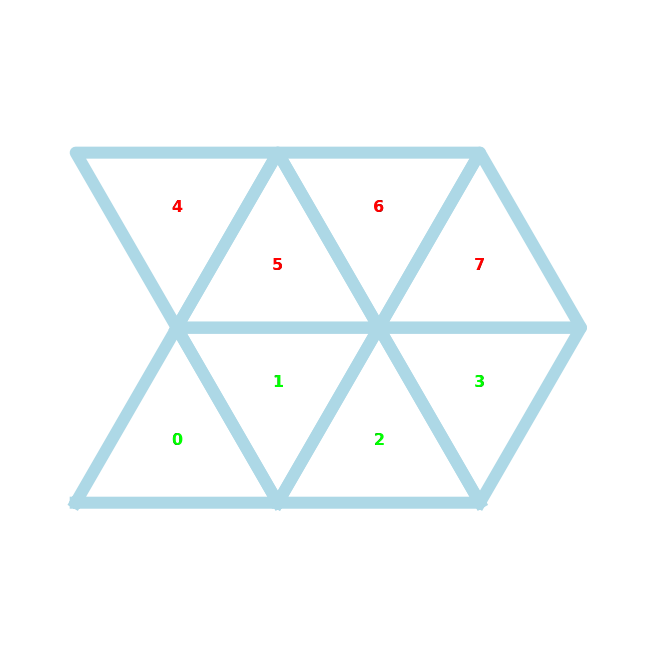

In [14]:
plot2D(grid.input_data, grid.curr_um, show_height=False, active_cells=active_cells, target_percents=target_percents, file_name = path+'/undeployed.png', show_plot=True)

### **Step Deployments**

In [15]:
deploy_in_steps(grid.curr_um,
                grid.input_data,
                grid.init_heights,
                grid.plate_thickness,
                active_cells,
                target_percents,
                path,
                deployment,
                steps=steps,
                verbose=True,
                dep=deployment,
                prj2D=(grid.rows==1 or grid.cols==1))

step  0/10 saved.
step  1/10 saved.
step  2/10 saved.
step  3/10 saved.
step  4/10 saved.
step  5/10 saved.
step  6/10 saved.
step  7/10 saved.
step  8/10 saved.
step  9/10 saved.
step 10/10 saved.


### **Images**

In [16]:
stress_type = 'maxBending'

In [17]:
# JPG and PNG
generate_2D(path,
            deployment,
            stress_type=stress_type,
            show_percent=False,
            show_plot=False,
            verbose=True)

Images for step 00 successfully saved.
Images for step 01 successfully saved.
Images for step 02 successfully saved.
Images for step 03 successfully saved.
Images for step 04 successfully saved.
Images for step 05 successfully saved.
Images for step 06 successfully saved.
Images for step 07 successfully saved.
Images for step 08 successfully saved.
Images for step 09 successfully saved.
Images for step 10 successfully saved.


In [18]:
generate_1D([path],
            [deployment],
            stress_type=stress_type,
            show_percent=False,
            show_plot=False)

In [19]:
img_to_gif(path, deployment, stress_type, duration=500, loop=2)